# Imports


In [11]:
import numpy as np
import pandas as pd
import string
letters = list(string.ascii_lowercase)

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme()

# Read data

In [12]:
df = pd.read_csv("../Diabetes_process.csv")
df.shape

(10000, 21)

In [13]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Feminino,Branco,35.800,83.400,123.900,10.900,152,114,...,50.200,99.200,37.500,7.200,Moderado,1538,Moderate,Never,0,1
1,1,48,Feminino,Asiatico,24.100,71.400,183.700,12.800,103,91,...,62.000,146.400,88.500,6.100,Moderado,2653,Moderate,Current,0,1
2,2,34,Feminino,Preto,25.000,113.800,142.000,14.500,179,104,...,32.100,164.100,56.200,6.900,Baixo,1684,Heavy,Former,1,0
3,3,62,Feminino,Asiatico,32.700,100.400,167.400,8.800,176,118,...,41.100,84.000,34.400,5.400,Baixo,3796,Moderate,Never,1,0
4,4,27,Feminino,Asiatico,33.500,110.800,146.400,7.100,122,97,...,53.900,92.800,81.900,7.400,Moderado,3161,Heavy,Current,0,0


In [14]:
TARGET = "Family_History_of_Diabetes"

# Analysis

In [15]:
df.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,4999.500,44.620,29.418,94.797,134.776,9.508,134.164,89.559,225.166,55.019,134.354,55.168,5.503,2742.482,0.507,0.516
std,2886.896,14.343,6.171,14.383,37.634,3.176,26.110,17.238,42.964,14.537,37.502,25.882,1.455,716.644,0.500,0.500
min,0.000,20.000,18.500,70.000,70.000,4.000,90.000,60.000,150.000,30.000,70.000,10.000,3.000,1500.000,0.000,0.000
25%,2499.750,32.000,24.100,82.200,102.175,6.800,112.000,75.000,187.875,42.300,101.675,32.600,4.200,2129.000,0.000,0.000
50%,4999.500,45.000,29.500,94.900,134.500,9.500,134.000,89.000,225.500,55.200,134.400,55.450,5.500,2727.000,1.000,1.000
75%,7499.250,57.000,34.700,107.000,167.800,12.300,157.000,105.000,262.400,67.900,166.400,77.500,6.800,3368.000,1.000,1.000
max,9999.000,69.000,40.000,120.000,200.000,15.000,179.000,119.000,300.000,80.000,200.000,100.000,8.000,3999.000,1.000,1.000


In [16]:
df.isna().sum()

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

# Univariate

In [17]:
df["Ethnicity"].value_counts()

Ethnicity
Preto        2539
Asiatico     2503
Branco       2482
Hispanico    2476
Name: count, dtype: int64

In [18]:
df["Ethnicity"].value_counts(normalize=True)

Ethnicity
Preto       0.254
Asiatico    0.250
Branco      0.248
Hispanico   0.248
Name: proportion, dtype: float64

In [19]:
df["Age"].value_counts().sort_index().head()

Age
20    181
21    205
22    197
23    201
24    195
Name: count, dtype: int64

# Graphs

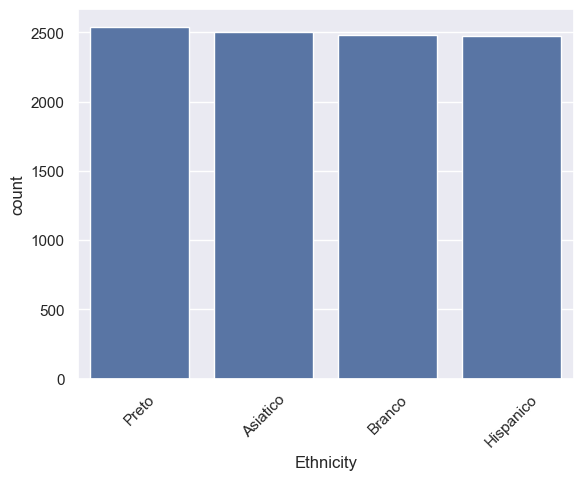

In [20]:
gp = df["Ethnicity"].value_counts()
gp = gp.reset_index()

sns.barplot(data=gp, x="Ethnicity", y="count")

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

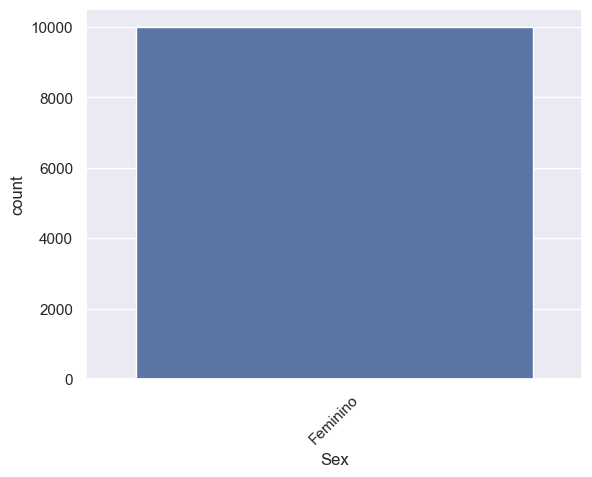

In [21]:
gp = df["Sex"].value_counts()
gp = gp.reset_index()

sns.barplot(data=gp, x="Sex", y="count")

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

# Bivariate

In [22]:
df.groupby("Ethnicity").agg({"Cholesterol_LDL": ["min", "mean", "median", "max"]})

Cholesterol_LDL                        
                      min    mean  median     max
Ethnicity                                        
Asiatico           70.000 134.695 134.800 200.000
Branco             70.000 134.471 136.500 200.000
Hispanico          70.100 133.828 132.200 199.900
Preto              70.000 134.416 134.000 199.900

## Graphs

In [23]:
gp = df.groupby("Ethnicity").agg(max=("Dietary_Intake_Calories", "max"))
gp.reset_index(inplace=True)
gp

,Ethnicity,max
0,Asiatico,3998
1,Branco,3999
2,Hispanico,3997
3,Preto,3998


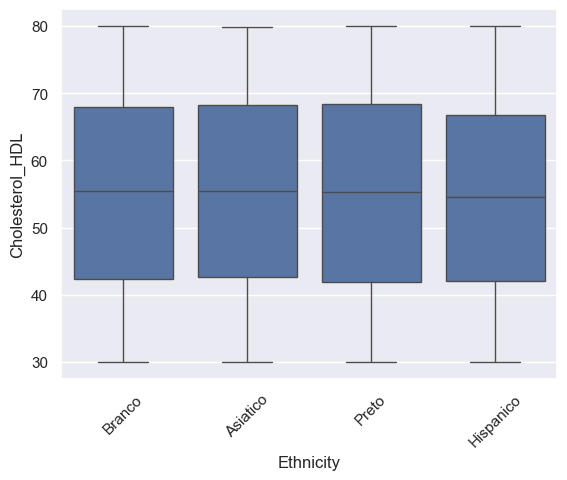

In [24]:
sns.boxplot(df, x='Ethnicity', y='Cholesterol_HDL')

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

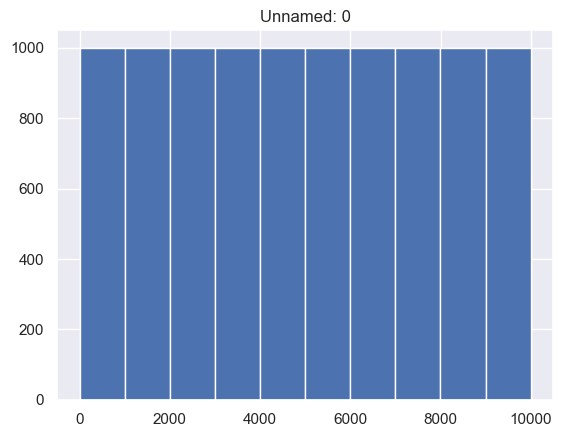

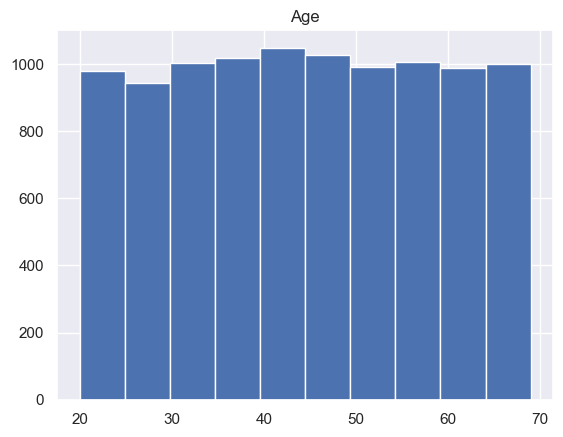

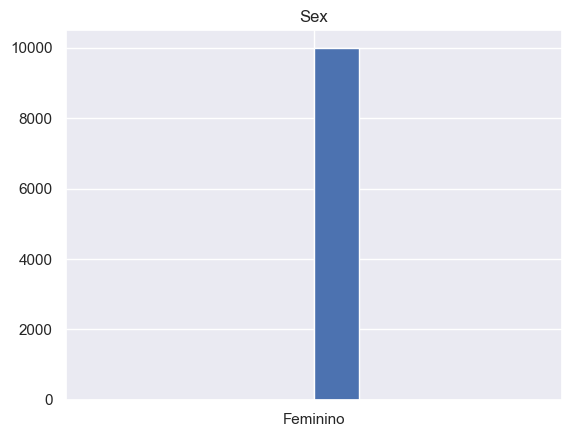

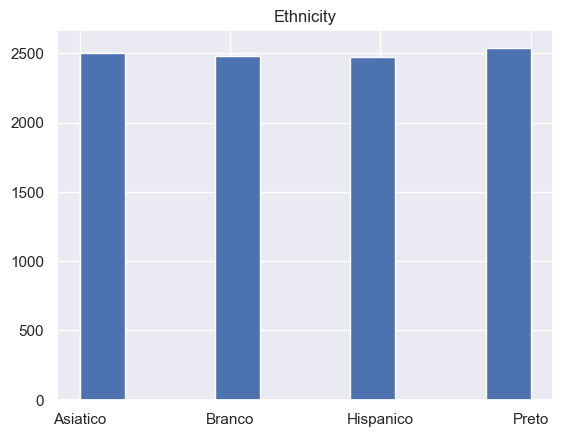

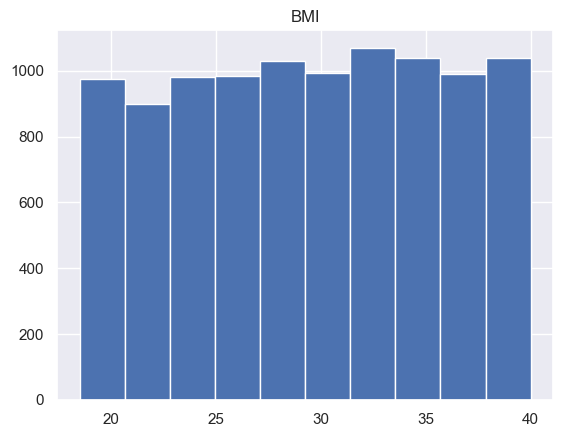

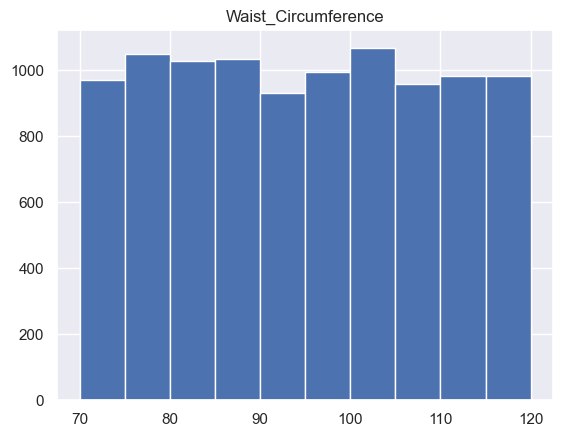

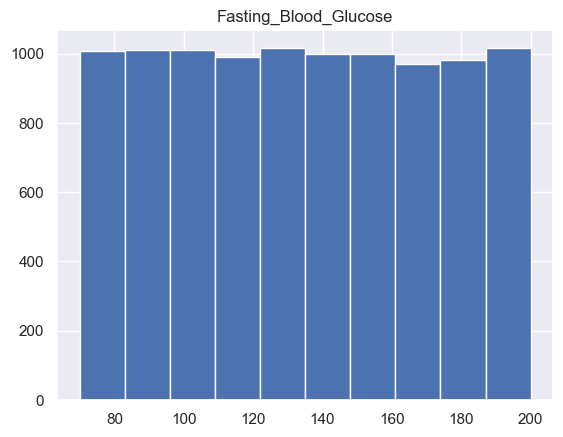

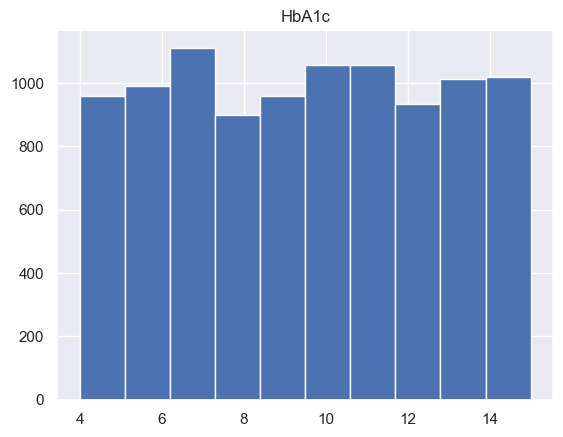

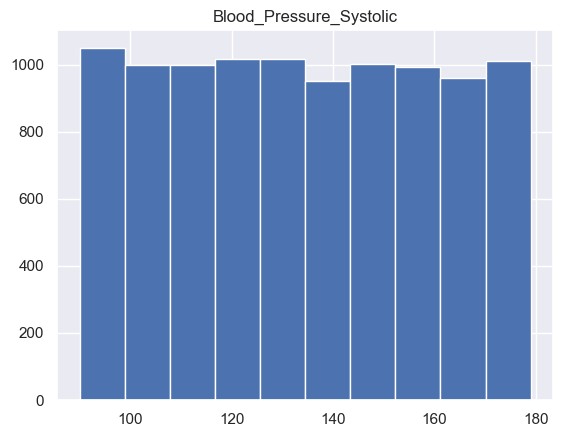

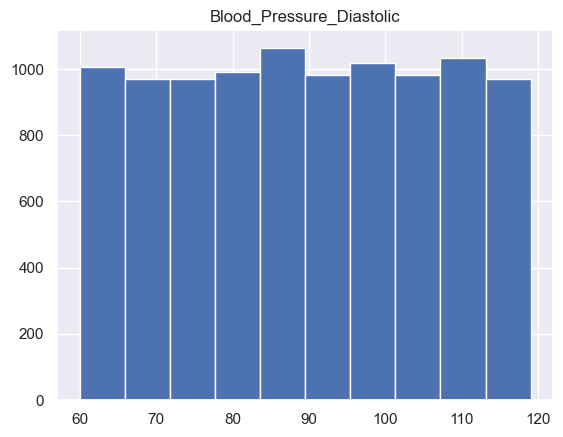

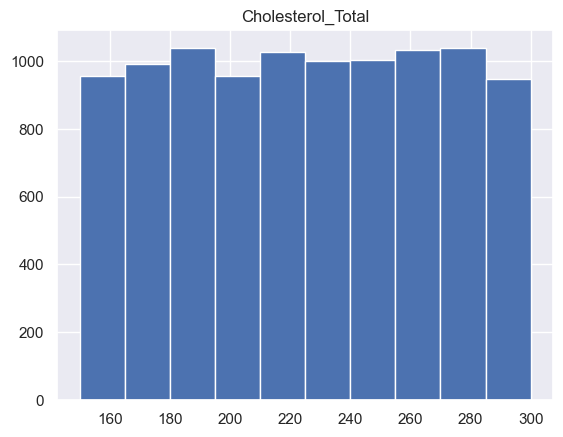

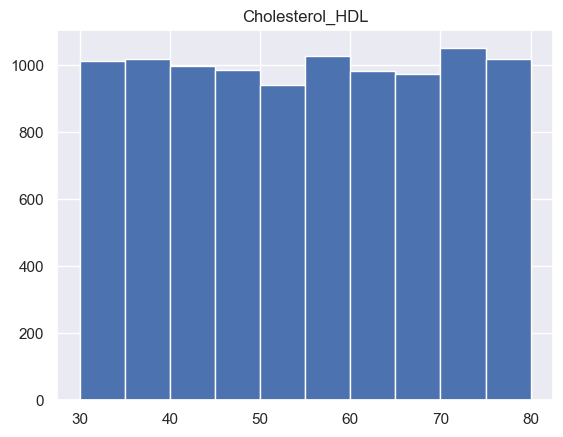

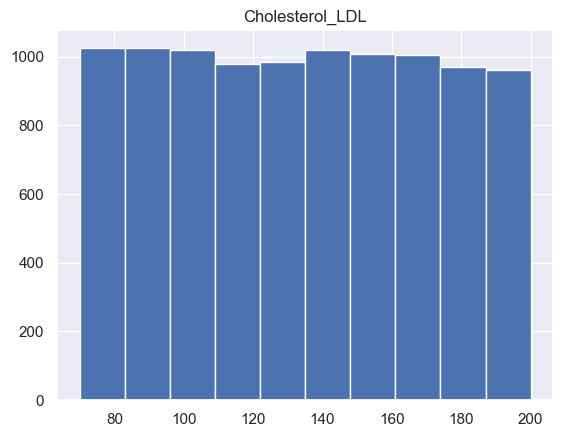

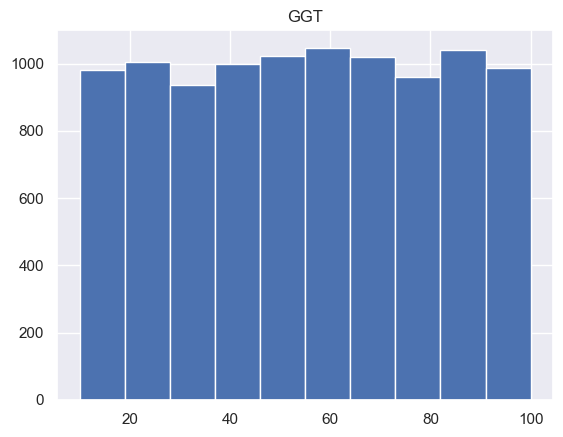

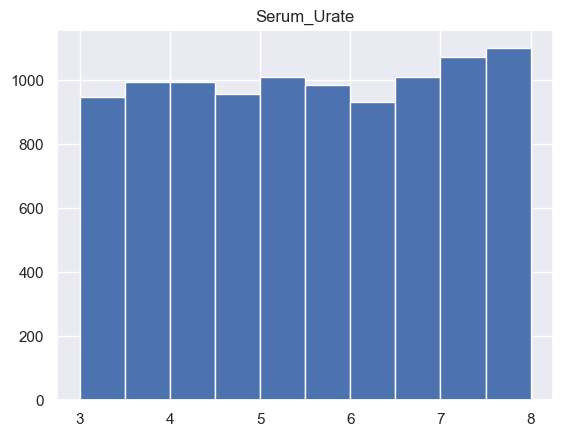

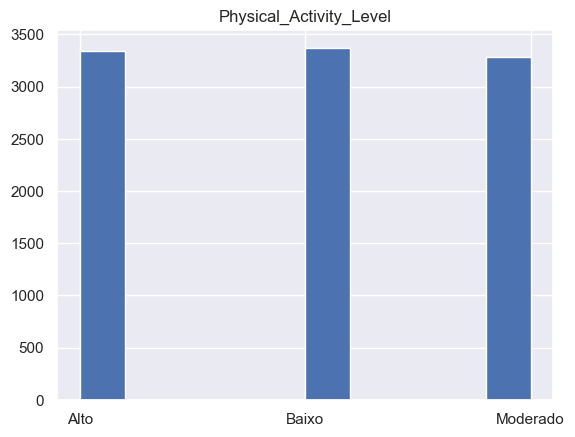

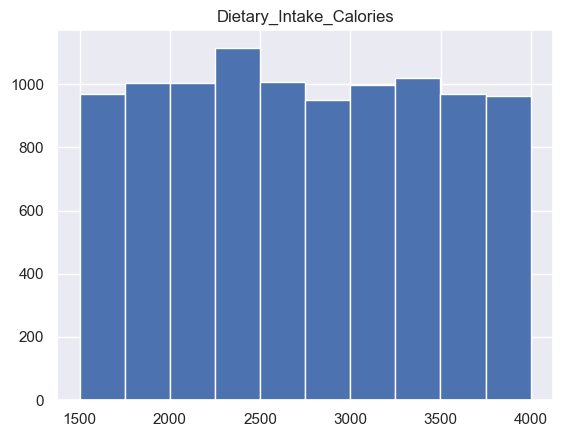

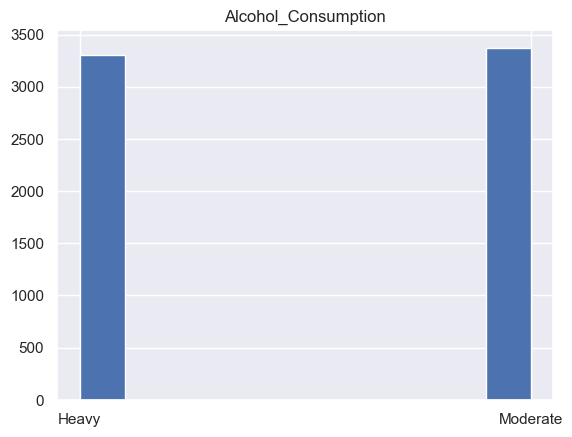

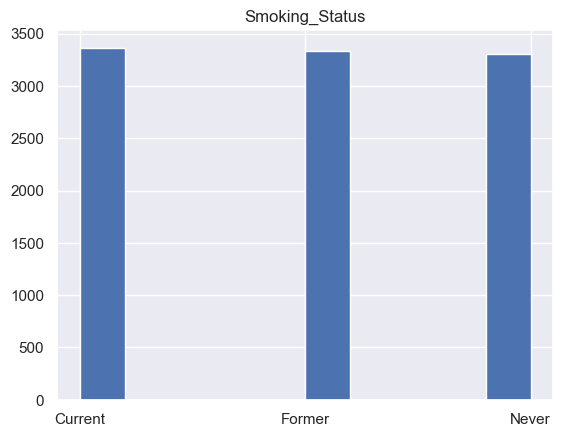

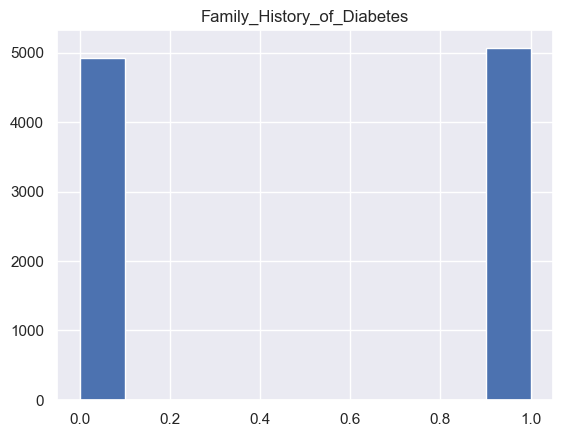

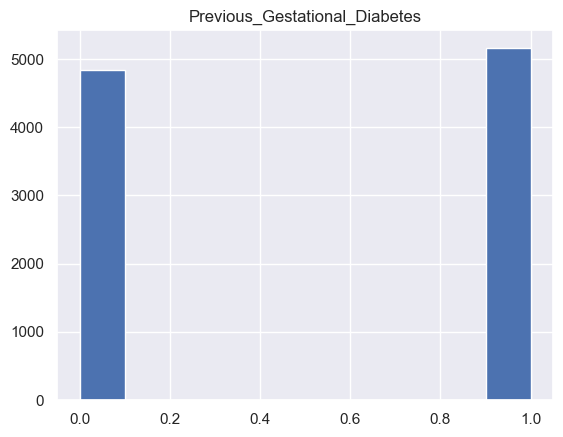

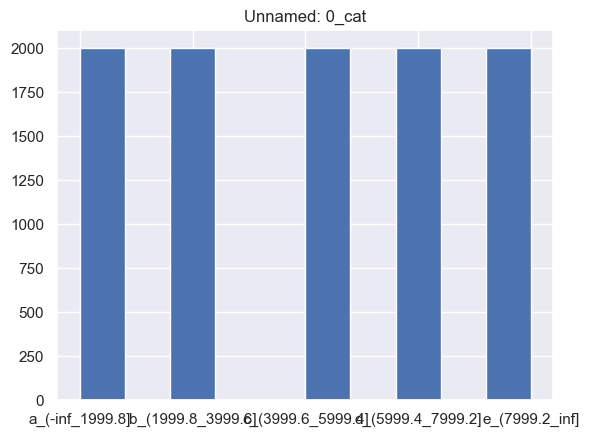

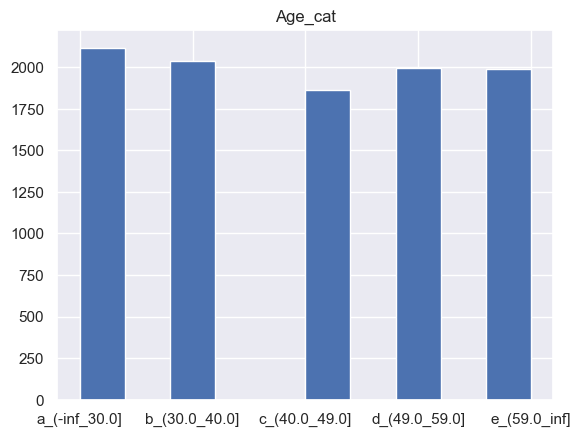

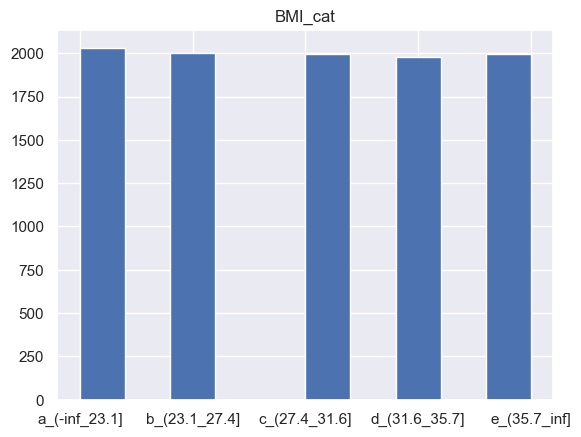

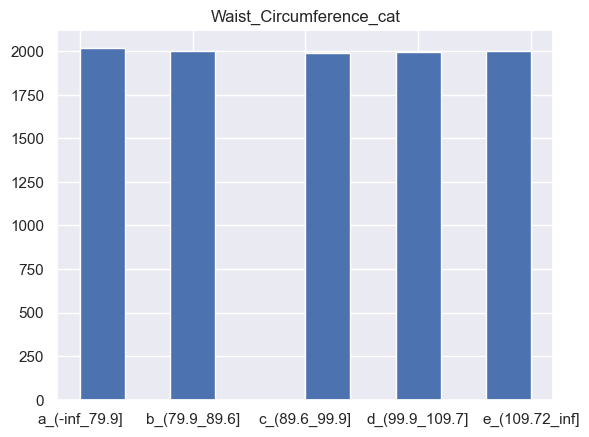

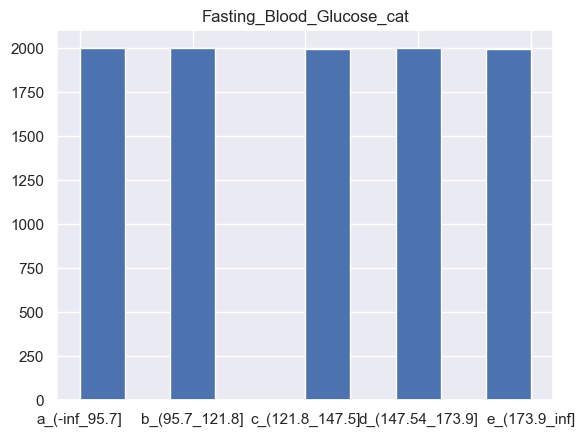

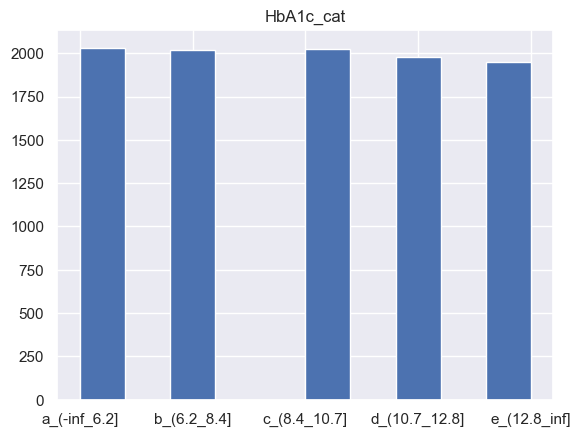

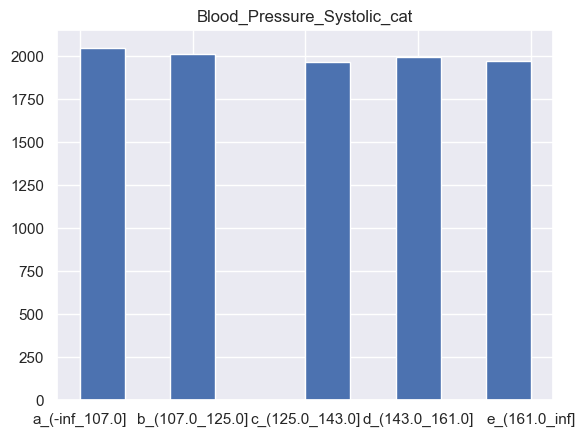

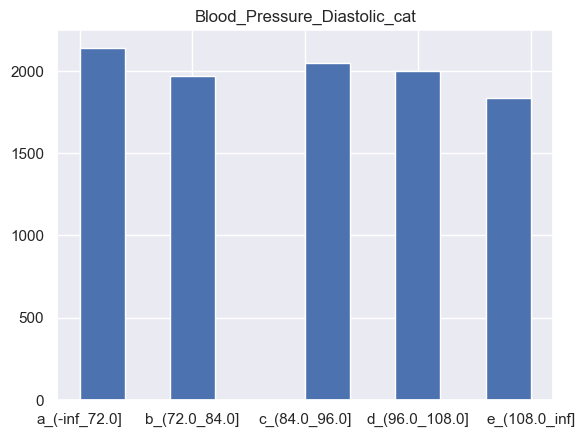

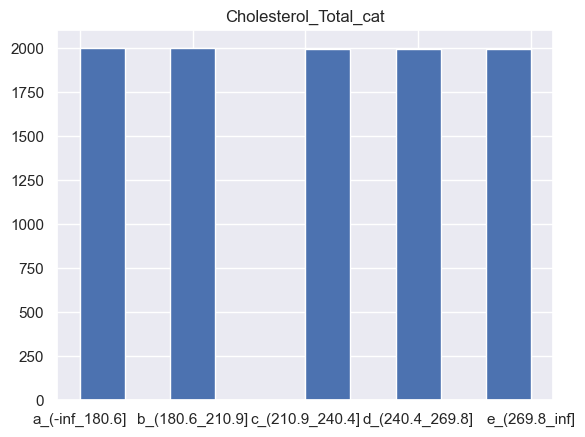

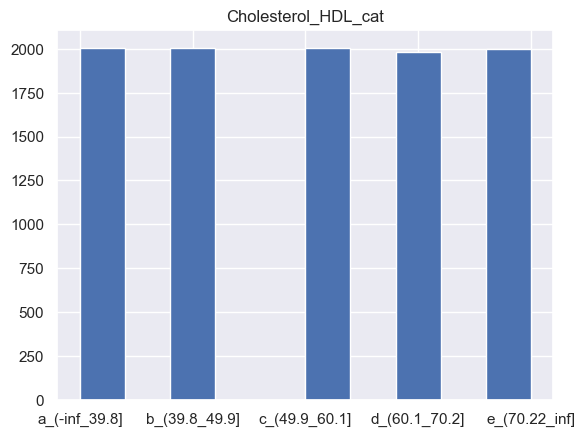

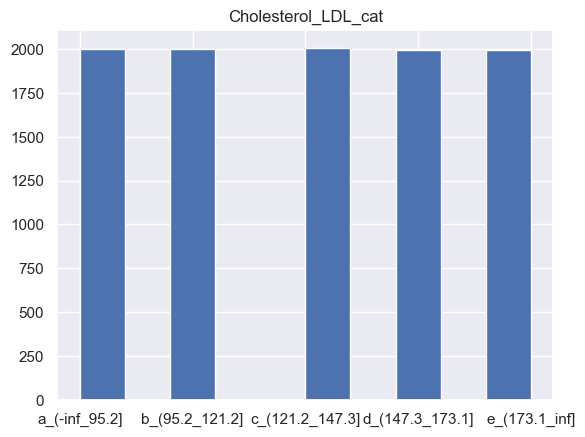

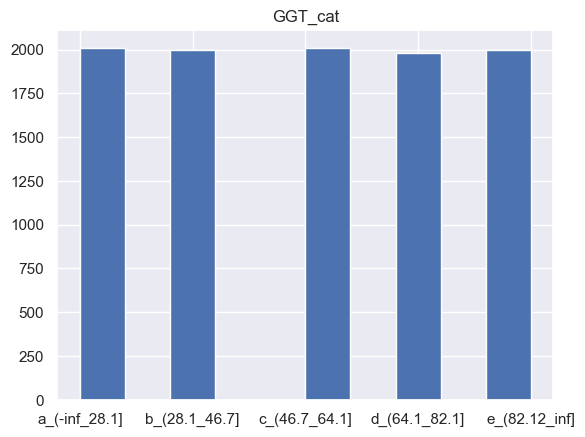

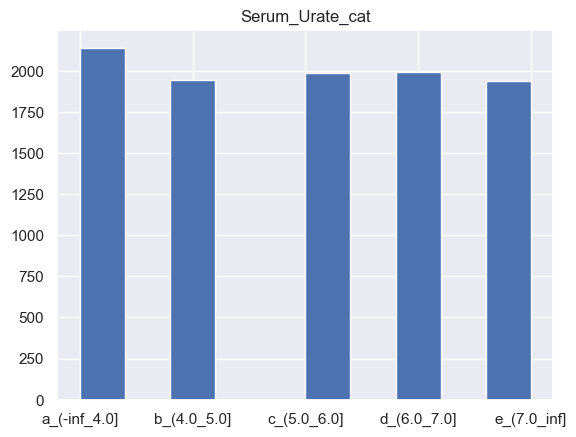

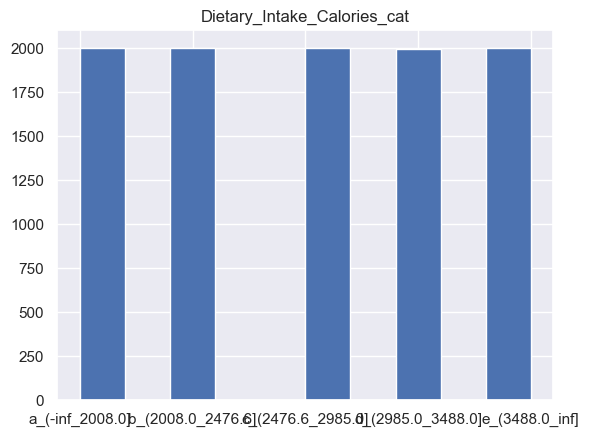

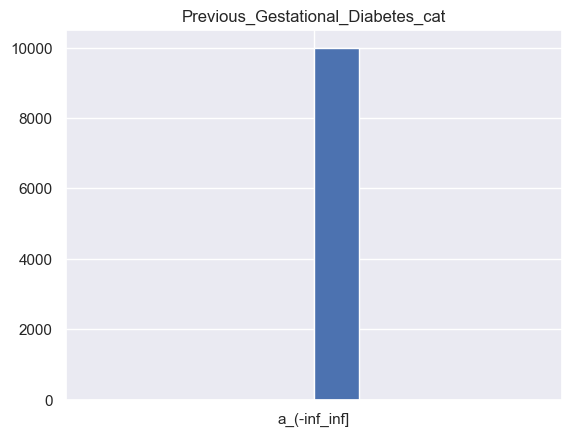

In [60]:
def plot_volume(data, column):
    plt.clf()
    data.sort_values(by=column,inplace=True)
    
    data[column].hist()

    plt.title(column)
    
    plt.show()
for col in df.columns:
    plot_volume(df, col)

In [25]:
gp = df.groupby(["Age", "Ethnicity"]).agg(mean=("Serum_Urate", "mean"))
gp.reset_index(inplace=True)
gp

,Age,Ethnicity,mean
0,20,Asiatico,5.440
1,20,Branco,5.695
2,20,Hispanico,5.516
3,20,Preto,5.171
4,21,Asiatico,5.631
...,...,...,...
195,68,Preto,5.354
196,69,Asiatico,5.128
197,69,Branco,5.615
198,69,Hispanico,5.795


<Axes: xlabel='Age', ylabel='mean'>

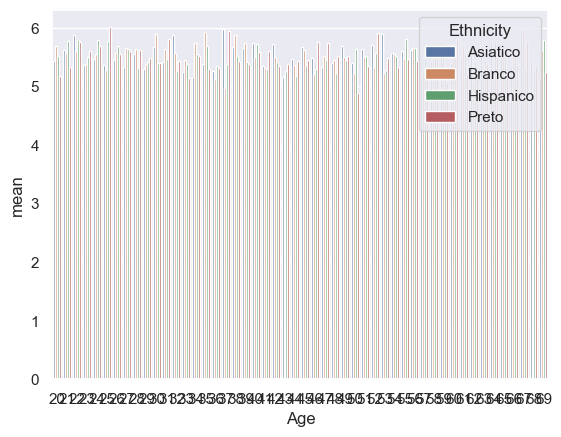

In [59]:
sns.barplot(gp, x="Age", y="mean", hue="Ethnicity")

In [39]:
gp_asia = gp[gp["Ethnicity"].isin(["Branco", "Hispanico", "Asiatico", "Preto"])]

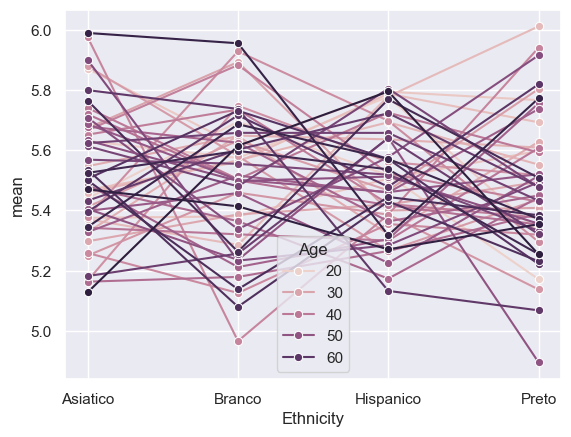

In [40]:
sns.lineplot(gp_asia, x="Ethnicity", y="mean", hue="Age", marker="o")

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

In [ ]:
def create_labels(bins):

    labels = []

    for i in range(len(bins)-1):
        label = f"{letters[i]}_({round(bins[i], 2)}_{round(bins[i+1], 2)}]"
        labels.append(label)

    return labels

def categorize_column(data, column, q=5):

    if column == "Oldpeak":
        q=4

    _, bins = pd.qcut(data[column], q=q, retbins=True, duplicates='drop') # Added duplicates='drop'
    bins[0] = -np.inf
    bins[-1] = np.inf

    labels = create_labels(bins)

    data[f"{column}_cat"] = pd.cut(data[column], bins=bins, labels=labels)
    # data[f"{column}_cat"] = data[f"{column}_cat"].astype(str)

    return data

In [48]:
numeric_cols = list(df.select_dtypes(include='number').columns)
numeric_cols.remove(TARGET)

In [49]:
for col in numeric_cols:
    categorize_column(df, col)

In [50]:
numeric_cols = df.select_dtypes(include='number').columns

In [51]:
numeric_cols

Index(['Unnamed: 0', 'Age', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

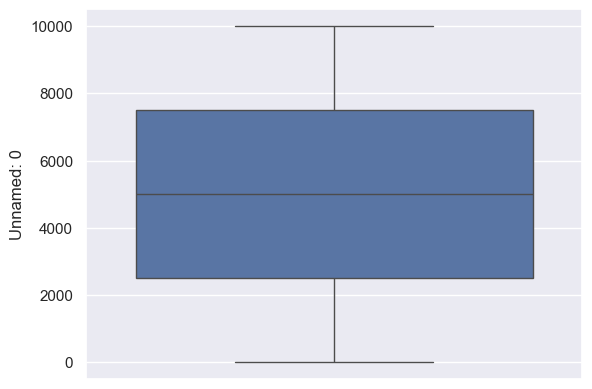

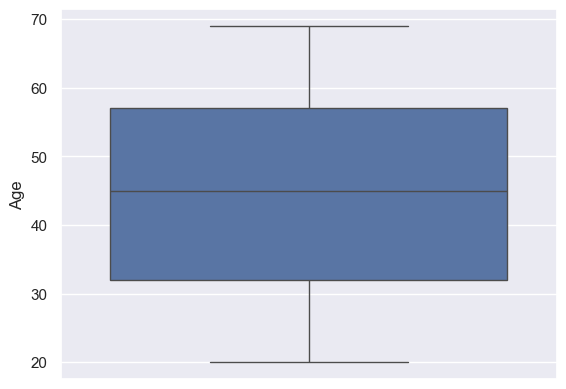

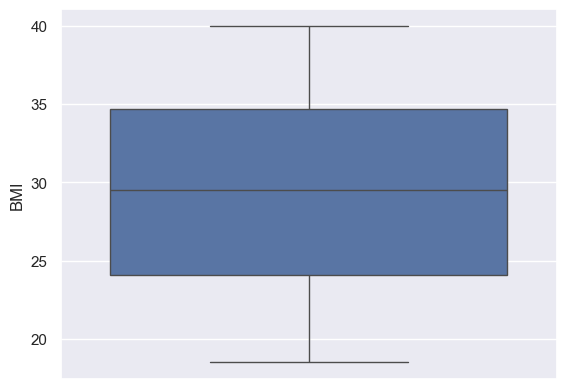

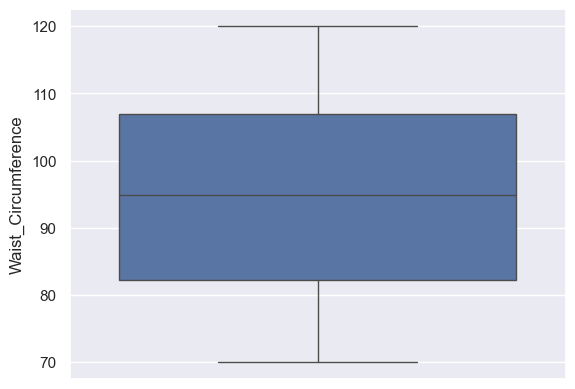

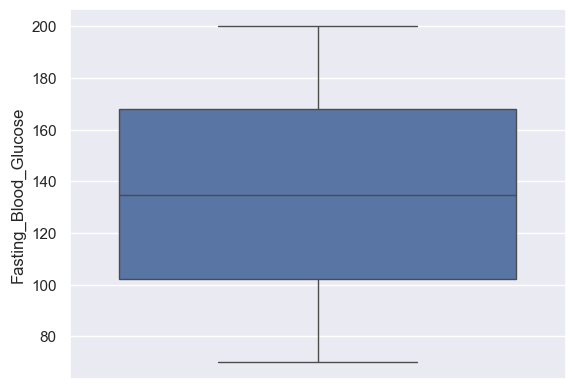

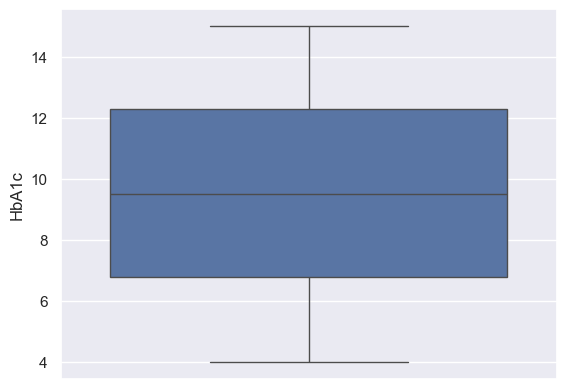

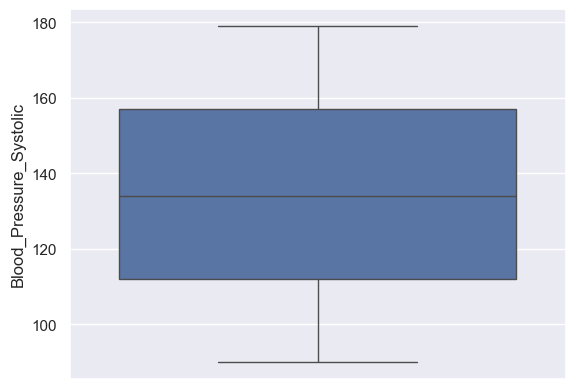

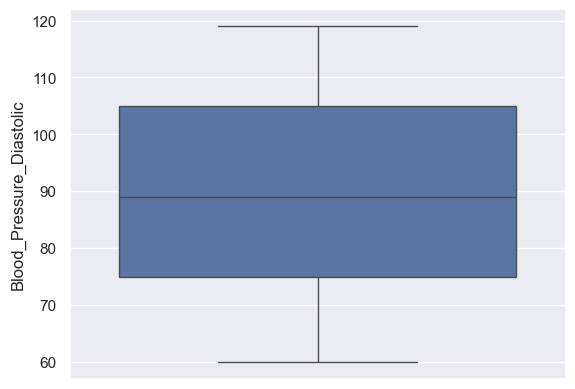

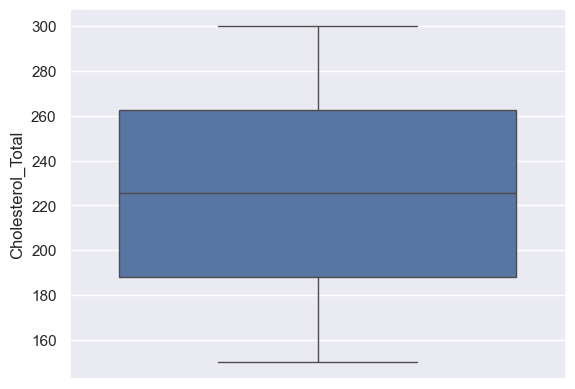

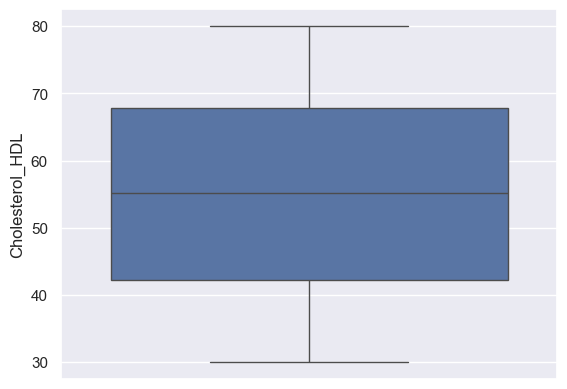

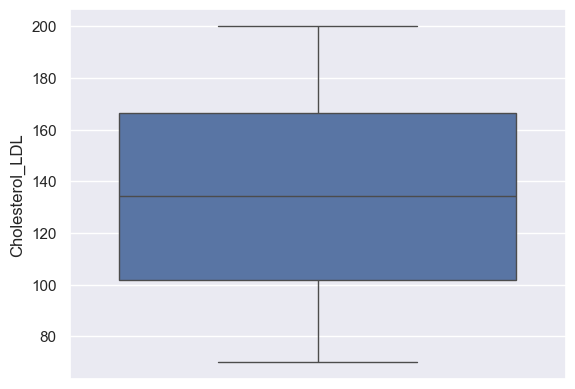

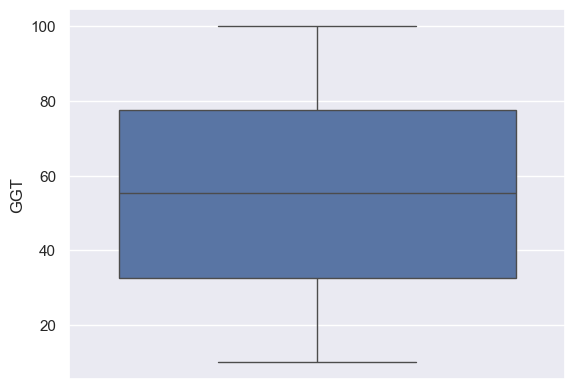

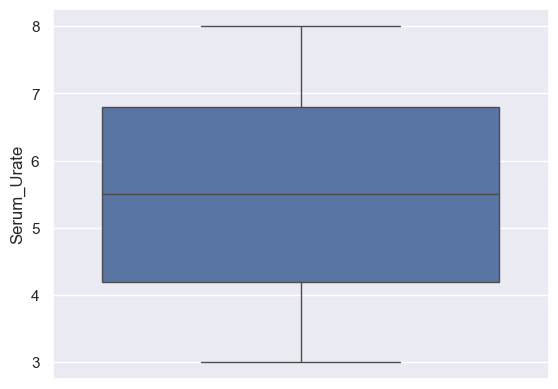

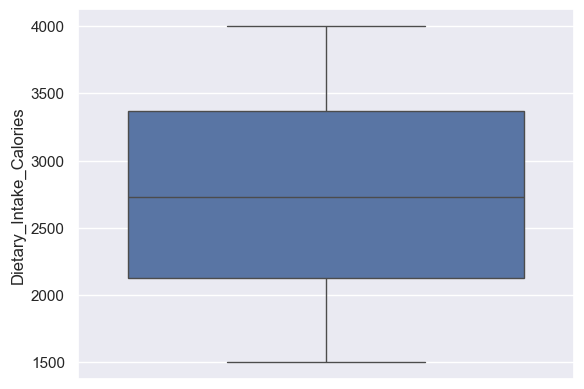

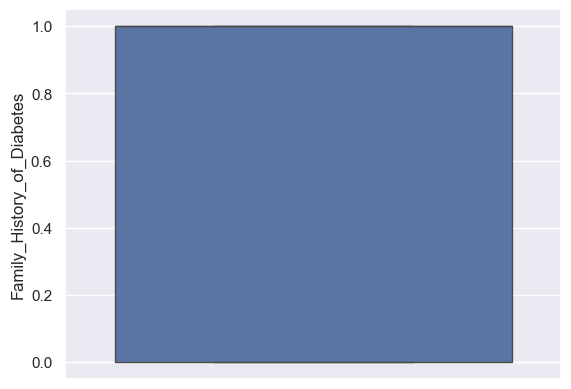

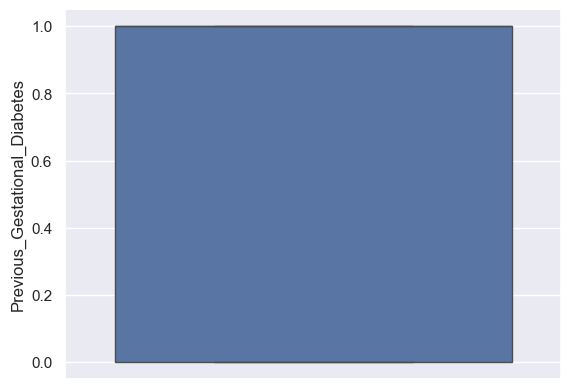

In [34]:
for col in numeric_cols:
    plt.clf()
    sns.boxplot(df[col])
    plt.show()

In [35]:
categoric_cols = list(df.select_dtypes(exclude='number').columns)

for col in [x for x in df.columns if "_cat" in x]:
    categoric_cols.remove(col)

In [36]:
categoric_cols

['Sex',
 'Ethnicity',
 'Physical_Activity_Level',
 'Alcohol_Consumption',
 'Smoking_Status']

<Axes: >

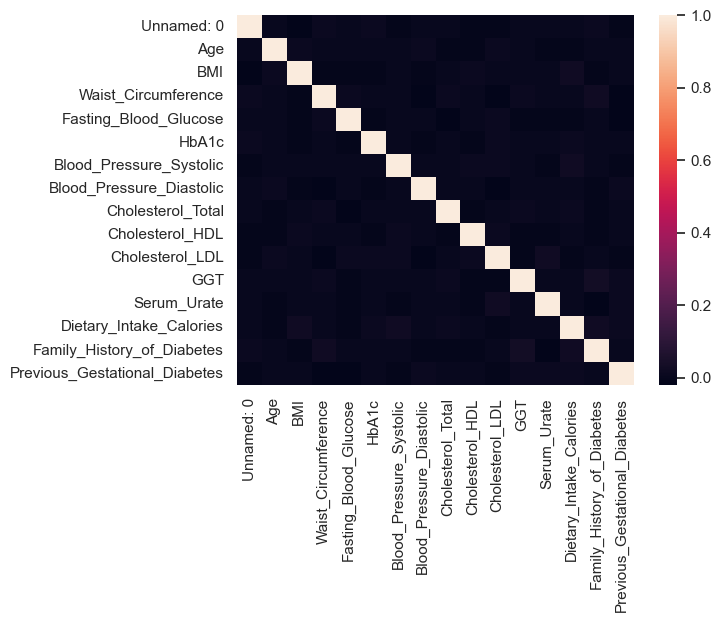

In [57]:
corr = df[numeric_cols].corr().round(2)

sns.heatmap(corr, annot=False)